In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import calendar

In [2]:
sc = 1361.1 # constante solar revisada
au  = 1.495978707e11 # 1 Unidade Astronômica em metros


# Dias do ano: 1 corresponde à primeiro de Janeiro e 365 corresponde à 31 de dezembro
day = np.arange(1,366)

# Meses do ano
dias_mes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


angle_day = 2*np.pi*(day/365)


In [51]:
def e0(x):
    # Variação da distância entre a Terra e o Sol
    return (1.000110 + 0.034221 * np.cos(x) + 0.001280 * np.sin(x) + 0.000719 * np.cos(2 * x) + 0.000077 * np.sin(
        2 * x))


def delta(x):
    # Declinação solar
    return (0.006918 - 0.399912 * np.cos(x) + 0.070257 * np.sin(x) - 0.006758 * np.cos(2 * x) + 0.000907 * np.sin(
        2 * x) - 0.002697 * np.cos(3 * x) + 0.001480 * np.sin(3 * x))

    # Equação do tempo
def Et(x):
    return ( 0.000075 + 0.001868 * np.cos(x) - 0.032077 * np.sin(x) - 0.014615 * np.cos(
        2 * x) - 0.04089 * np.sin(2 * x))




In [ ]:
def figura(r, x, h, title , ylabel, name ):
  au  = 1.495978707e11

  fig, ax = plt.subplots()
  ax.plot(x)

  ax.axvline(np.argmax(r/au),  ls= '-.', lw = 1, color='black')
  ax.axvline(np.argmin(r/au),  ls= '-.', lw = 1, color='black')
  ax.text(np.argmax(r/au), h, 'afélio', horizontalalignment='center', verticalalignment='center', rotation='vertical', bbox=dict(facecolor='white', edgecolor='none'), fontfamily='monospace')
  ax.text(np.argmin(r/au), h, 'periélio', horizontalalignment='center', verticalalignment='center', rotation='vertical', bbox=dict(facecolor='white', edgecolor='none'), fontfamily='monospace')
  ax.axhline(h, lw = 1, color='black')
  #ax.legend()
  ax.set_xlabel('Tempo [meses do ano]')
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  # define os ticks do eixo x com as posições dos meses e os rótulos com as iniciais dos meses
  ax.set_xticks(pos_meses)
  ax.set_xticklabels([calendar.month_abbr[i] for i in range(1,13)])
  plt.tight_layout()
  plt.show()

  fig.savefig('/content/sample_data/' + name + '.png', transparent=True,  dpi=600)

# Variação da distância entre a Terra e o Sol



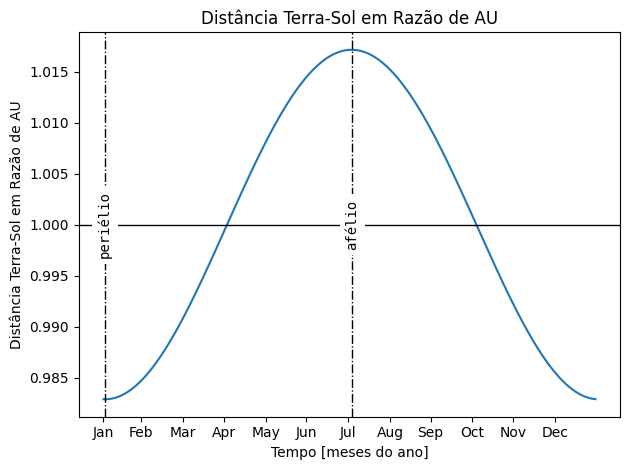

In [60]:
r = au/np.sqrt(e0(angle_day))

# =============================
# Figura: Variação da distância entre a Terra e o Sol
# =============================


figura(r,
       r/au,
       1,
       'Distância Terra-Sol em Razão de AU',
       'Distância Terra-Sol em Razão de AU',
       'r')

# Variação da TSI

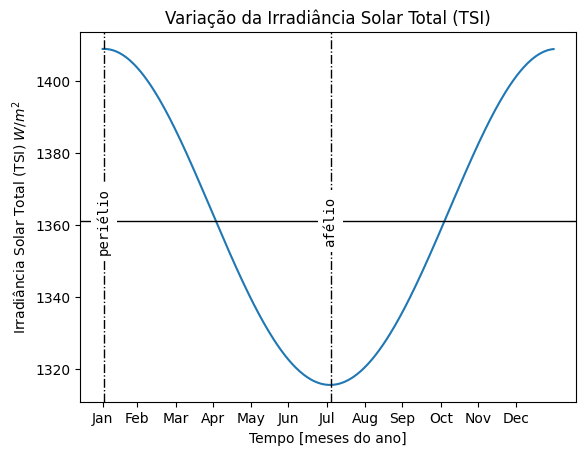

max: 1408.8438141596887
min: 1315.623707970844
porcento maior: 3.4963528311855416
porcento menor: -3.3517739122574968


In [49]:
I = sc*e0(angle_day)

# =============================
# Figura: Variação da TSI
# =============================

figura(r,
       I,
       sc,
       'Variação da Irradiância Solar Total (TSI)',
       r'Irradiância Solar Total (TSI) $W/m^2$',
       'tsi')

maior = (np.max(I) - np.mean(I))/np.mean(I)*100
menor = (np.min(I) - np.mean(I))/np.mean(I)*100
print('max:', np.max(I))
print('min:', np.min(I))
print('porcento maior:', maior)
print('porcento menor:', menor)

# Declinação Solar

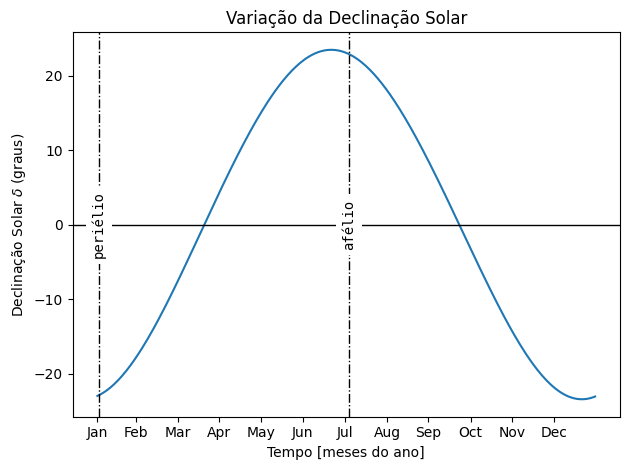

max: 23.455568693844302
min: -23.426039035075107


In [54]:
dec = np.degrees(delta(angle_day))
# =============================
# Figura: Declinação solar
# =============================


figura(r,
       dec,
       0,
       'Variação da Declinação Solar',
       r'Declinação Solar $\delta$ (graus)',
       'dec')

print('max:', np.max(dec))
print('min:', np.min(dec))

# Equação do tempo

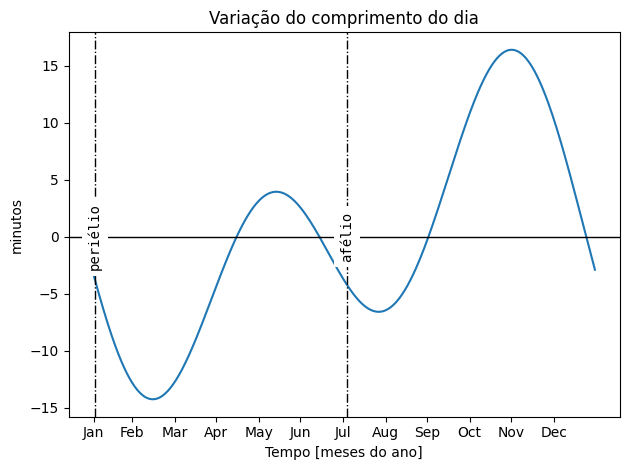

fator de conversão: 229.18311805232932
max: 16.38746159660171
min: -14.266543660620313


In [59]:
# Fator de conversão para minutos
#Todo meridiano padrão é multiplo de 15º e todos os horários padrão são múltiplos de uma hora.
standard = np.radians(15)

Etime = Et(angle_day)*(60/standard)

# =============================
# Figura: Equação do tempo
# =============================


figura(r,
       Etime,
       0,
       'Variação do comprimento do dia',
       r'minutos',
       'et')
print('fator de conversão:', (60/standard))
print('max:', np.max(Etime))
print('min:', np.min(Etime))